## Tasca M8 T01

### Exercici 1
***
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')

df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


Les variables que tenim en aquest dataset són les següents:

- **status_id**: Identificador únic per a cada publicació d'estat o post a les xarxes socials.

- **status_type**: Tipus de publicació ("video", "photo", "link" o "status").

- **status_published**: Data i hora de publicació de les entrades a les xarxes socials.

- **num_reactions**: Nombre de reaccions que ha rebut una publicació.

- **num_comments**: Indica el nombre de comentaris que ha rebut una publicació.

- **num_shares**: Nombre de vegades que s'ha compartit una publicació a través de les xarxes socials.

- **num_likes**: Nombre de "m'agrada" que ha rebut una publicació.

- **num_loves**: Nombre de reaccions de "està bé" o "em fa molta estima" que ha rebut una publicació.

- **num_wows**: Nombre de reaccions de "em fa gràcia" que ha rebut una publicació. 

- **num_hahas**: Indica el nombre de reaccions "m'he rigut" que ha rebut una publicació. 

- **num_sads**: Compta el nombre de reaccions de "està trist" que ha rebut una publicació.

- **num_angrys**: Nombre de reaccions d'"em fa enfadar" o "m'enfado" que ha rebut una publicació.

- **Column1, Column2, Column3, Column4**: Aquestes columnes tots els seus valors són NaN, per tant, no tenen informació vàlida.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.duplicated().sum()

51

#### Neteja del dataset

Procedim a fer neteja del dataset i el seu preprocessament:

- Eliminem les columnes amb valors nuls ('Column1', 'Column2', 'Column3' y 'Column4'), ja que no contenen cap registre, ni informació.

- Veiem que hi ha 51 duplicats que eliminarem.

- La variable 'status_id' és un identificador i no aporta informació rellevant a l'anàlisi, l'eliminarem.

- L'atribut 'status_published' conté informació conjunta de la hora i la data de la publicació, per tant, les separarem.

- A la variable 'status_type' li crearem columnes dummies per a que puguin ser utilitzades després pels algoritmes d'aprenentatge automàtic (necessitem eliminar la variable original i una de les dummies per evitar la duplicació d'informació).

- Per últim, farem una estandardització, ja que les variables tenen diferents escales i els models podrien donar més importància a les variables de més escala.

In [7]:
# Eliminar duplicats
df.drop_duplicates(subset='status_id', inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
# Eliminar columnes no necessàries
df = df.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6997 non-null   object
 1   status_published  6997 non-null   object
 2   num_reactions     6997 non-null   int64 
 3   num_comments      6997 non-null   int64 
 4   num_shares        6997 non-null   int64 
 5   num_likes         6997 non-null   int64 
 6   num_loves         6997 non-null   int64 
 7   num_wows          6997 non-null   int64 
 8   num_hahas         6997 non-null   int64 
 9   num_sads          6997 non-null   int64 
 10  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 656.0+ KB


In [11]:
# Separar la columna amb la data i hora
df[['date', 'time']] = df['status_published'].str.split(' ', expand=True)

# Eliminem la columna original
df.drop('status_published', axis=1, inplace=True)

df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,video,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,photo,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,video,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,photo,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,photo,213,0,0,204,9,0,0,0,0,4/18/2018,3:22
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,9/24/2016,2:58
7046,photo,16,0,0,14,1,0,1,0,0,9/23/2016,11:19
7047,photo,2,0,0,1,1,0,0,0,0,9/21/2016,23:03
7048,photo,351,12,22,349,2,0,0,0,0,9/20/2016,0:43


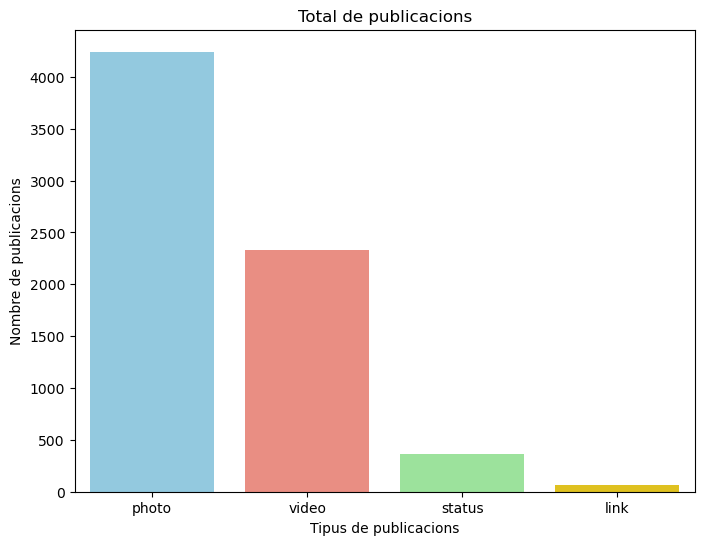

In [12]:
# Observació gràfica de la distribució de les dades

counts = df['status_type'].value_counts()
colors = {'video': 'skyblue', 'photo': 'salmon', 'link': 'lightgreen', 'status': 'gold'}

plt.figure(figsize=(8, 6))  
sns.barplot(x=counts.index, y=counts.values, palette=colors.values())

plt.xlabel('Tipus de publicacions')
plt.ylabel('Nombre de publicacions')
plt.title('Total de publicacions')

plt.show()

En el gràfic destaca el nombre de publicacions de tipus foto, seguida dels videos, i clarament més lluny, queden els estats de facebook i els links.

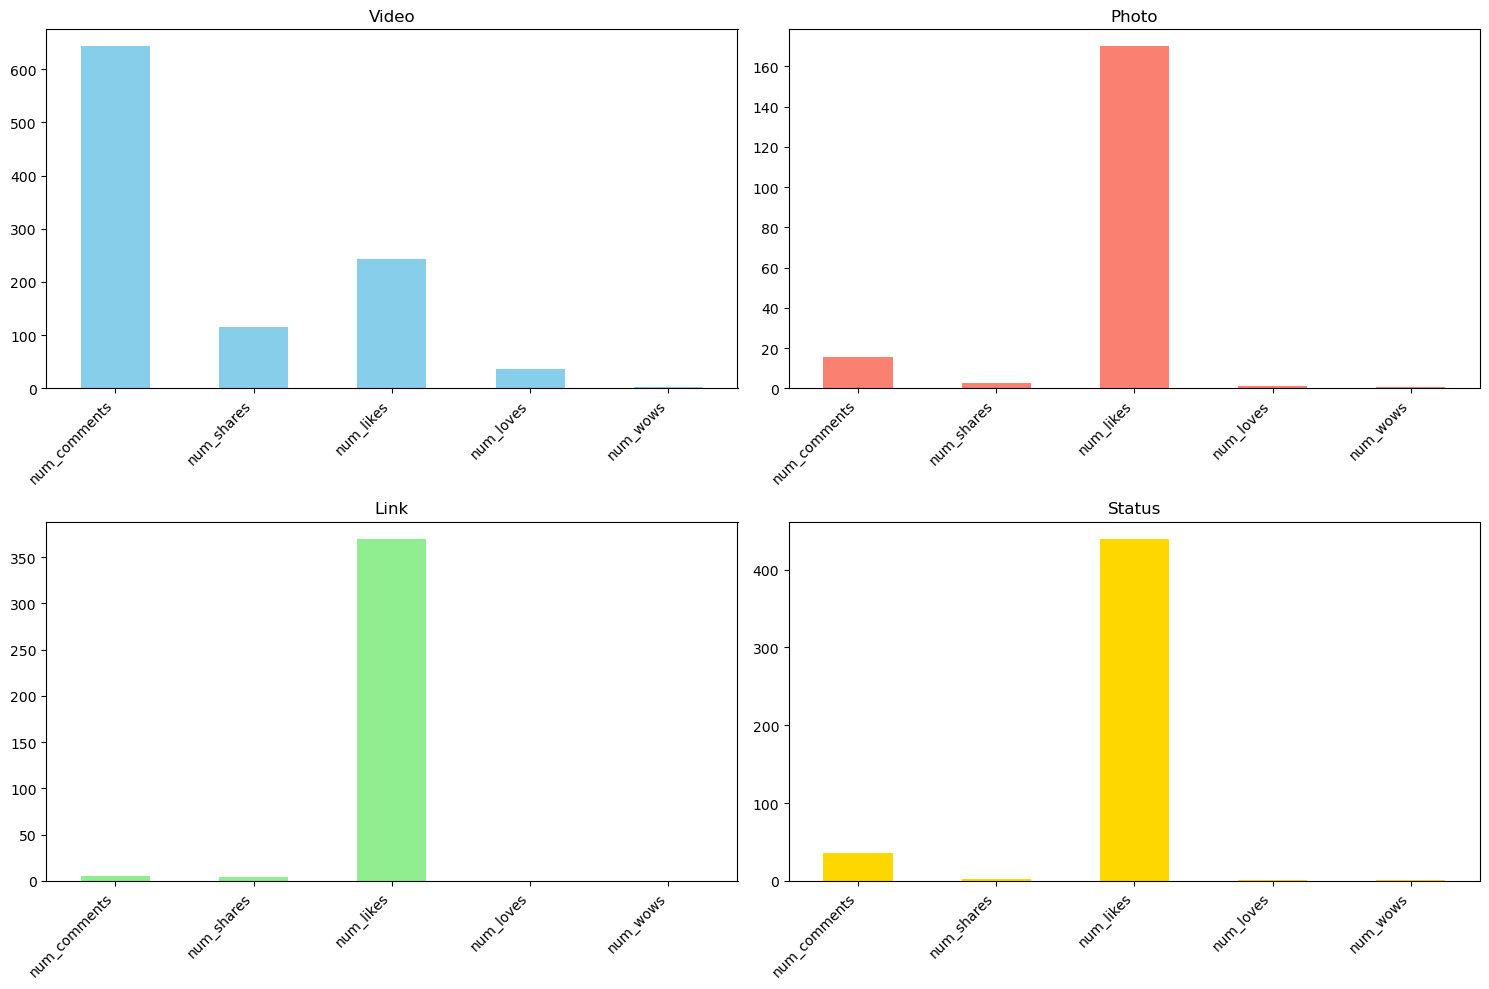

In [13]:
# Filtrar les dades per tipus de publicació
video_data = df[df['status_type'] == 'video']
photo_data = df[df['status_type'] == 'photo']
link_data = df[df['status_type'] == 'link']
status_data = df[df['status_type'] == 'status']

# Crea un gràfic per cada tipus de reacció (mitjana)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

video_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].mean().plot(kind='bar', ax=axes[0, 0], color='skyblue')
photo_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].mean().plot(kind='bar', ax=axes[0, 1], color='salmon')
link_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].mean().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
status_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].mean().plot(kind='bar', ax=axes[1, 1], color='gold')

# Afegir les etiquetes i el disseny
axes[0, 0].set_title('Video')
axes[0, 1].set_title('Photo')
axes[1, 0].set_title('Link')
axes[1, 1].set_title('Status')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Com podem observar la mitjana del nombre de likes és la que destaca en tots els tipus de publicacions, excepte en els vídeos, on hi ha més reaccions de tipus comentaris.

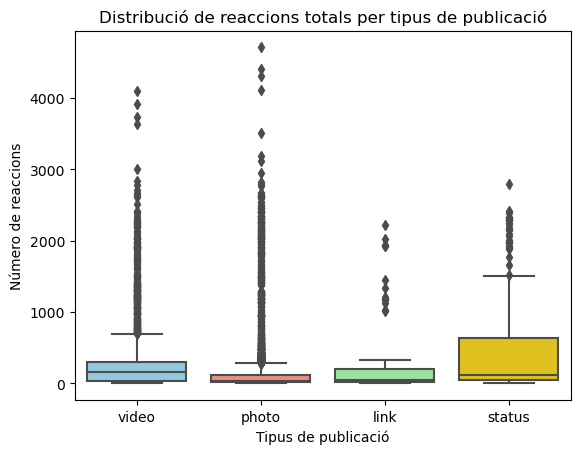

In [14]:
colors = {'video': 'skyblue', 'photo': 'salmon', 'link': 'lightgreen', 'status': 'gold'}

sns.boxplot(x='status_type', y='num_reactions', data=df, palette=colors.values())

plt.xlabel('Tipus de publicació')
plt.ylabel('Número de reaccions')
plt.title('Distribució de reaccions totals per tipus de publicació')
plt.show()

En aquests boxplots observem que totes les categories tenen molts outliers (ens servirà per a quan haguem d'estandarditzar).

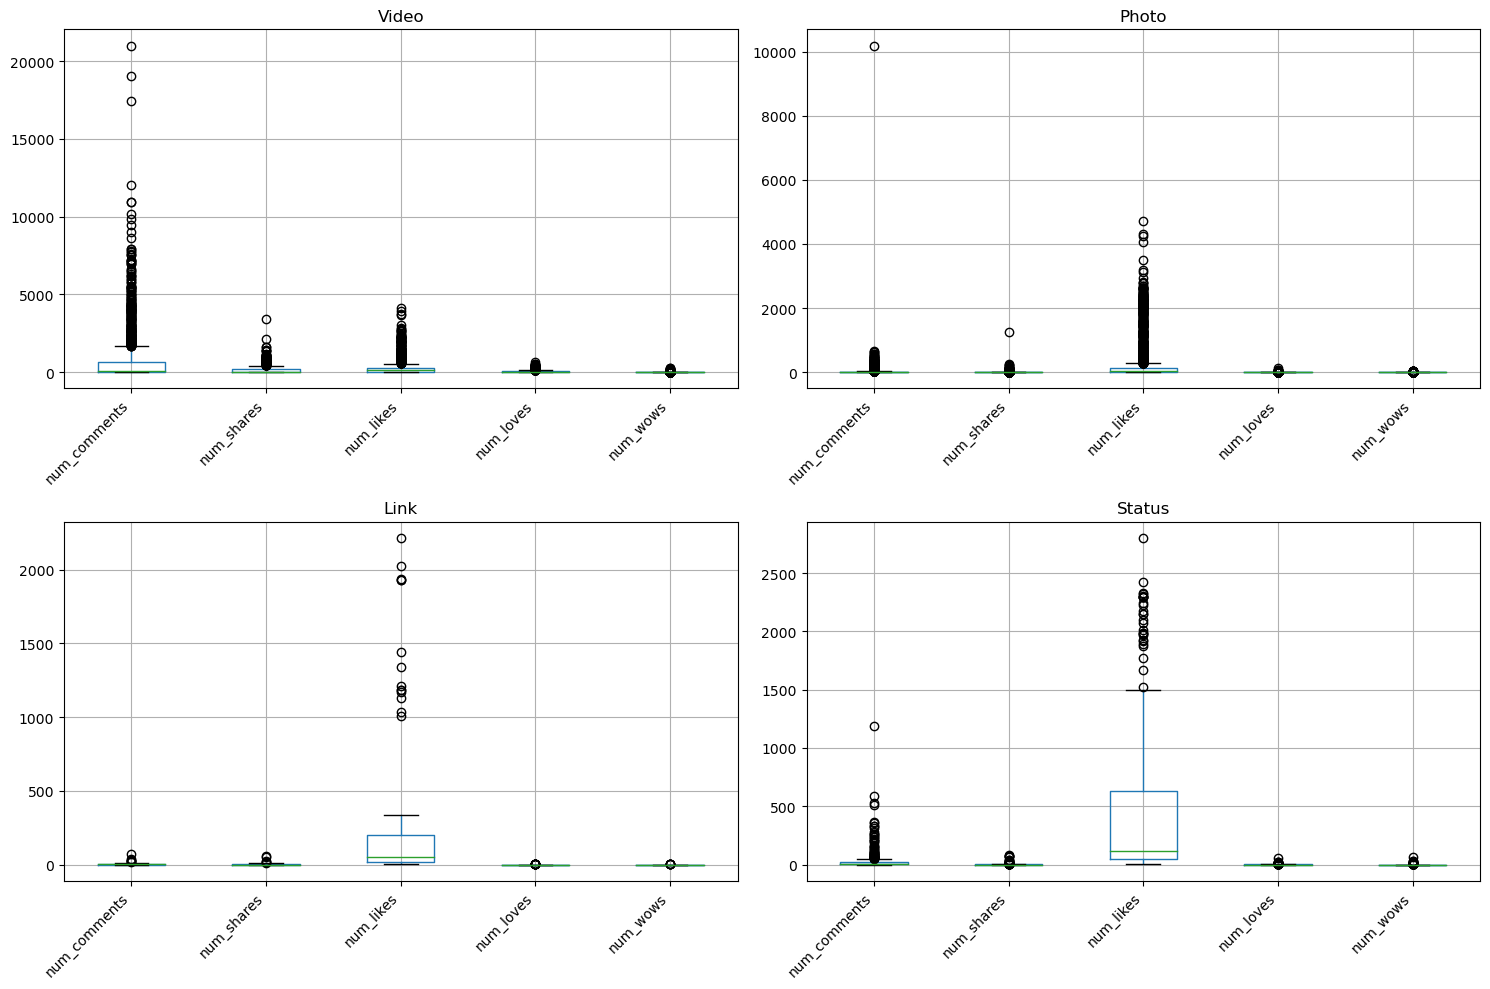

In [15]:
# Filtrar les dades per tipus de publicació
video_data = df[df['status_type'] == 'video']
photo_data = df[df['status_type'] == 'photo']
link_data = df[df['status_type'] == 'link']
status_data = df[df['status_type'] == 'status']

# Crea un boxplot per cada tipus de reacció
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

video_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].boxplot(ax=axes[0, 0])
photo_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].boxplot(ax=axes[0, 1])
link_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].boxplot(ax=axes[1, 0])
status_data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']].boxplot(ax=axes[1, 1])

# Afegir les etiquetes i el disseny
axes[0, 0].set_title('Video')
axes[0, 1].set_title('Photo')
axes[1, 0].set_title('Link')
axes[1, 1].set_title('Status')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Podem observar com la major part de les vegades el tipus de reacció més donada és fer un 'like'. Tot i això, veiem com als vídeos, també destaquen el nombre de comentaris. Destacar també, com ja hem comentat en l'altre gràfic, la gran quantitat d'outliers.

#### Columnes dummies

In [16]:
# Creació columnes dummies
df = pd.get_dummies(df, columns=['status_type'], drop_first=True)

df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,4/22/2018,6:00,0,0,1
1,150,0,0,150,0,0,0,0,0,4/21/2018,22:45,1,0,0
2,227,236,57,204,21,1,1,0,0,4/21/2018,6:17,0,0,1
3,111,0,0,111,0,0,0,0,0,4/21/2018,2:29,1,0,0
4,213,0,0,204,9,0,0,0,0,4/18/2018,3:22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,9/24/2016,2:58,1,0,0
7046,16,0,0,14,1,0,1,0,0,9/23/2016,11:19,1,0,0
7047,2,0,0,1,1,0,0,0,0,9/21/2016,23:03,1,0,0
7048,351,12,22,349,2,0,0,0,0,9/20/2016,0:43,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   num_reactions       6997 non-null   int64 
 1   num_comments        6997 non-null   int64 
 2   num_shares          6997 non-null   int64 
 3   num_likes           6997 non-null   int64 
 4   num_loves           6997 non-null   int64 
 5   num_wows            6997 non-null   int64 
 6   num_hahas           6997 non-null   int64 
 7   num_sads            6997 non-null   int64 
 8   num_angrys          6997 non-null   int64 
 9   date                6997 non-null   object
 10  time                6997 non-null   object
 11  status_type_photo   6997 non-null   uint8 
 12  status_type_status  6997 non-null   uint8 
 13  status_type_video   6997 non-null   uint8 
dtypes: int64(9), object(2), uint8(3)
memory usage: 676.5+ KB


In [18]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6997.0,224.95,452.93,0.0,17.0,58.0,216.0,4710.0
num_comments,6997.0,225.61,892.86,0.0,0.0,4.0,22.0,20990.0
num_shares,6997.0,40.27,132.06,0.0,0.0,0.0,4.0,3424.0
num_likes,6997.0,209.90,439.60,0.0,17.0,57.0,182.0,4710.0
num_loves,6997.0,12.76,40.11,0.0,0.0,0.0,3.0,657.0
num_wows,6997.0,1.25,8.73,0.0,0.0,0.0,0.0,278.0
num_hahas,6997.0,0.70,3.97,0.0,0.0,0.0,0.0,157.0
num_sads,6997.0,0.23,1.48,0.0,0.0,0.0,0.0,51.0
num_angrys,6997.0,0.11,0.69,0.0,0.0,0.0,0.0,31.0
status_type_photo,6997.0,0.61,0.49,0.0,0.0,1.0,1.0,1.0


Ja hem observat, analitzat i netejat el dataset. Ara passem a la part de processament de dades.

#### Estandardització

Primerament, mirem si les dades segueixen una distribució normal.

In [19]:
# Test de Shapiro-Wilk

from scipy import stats
from scipy.stats import shapiro

df_int = df[['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']]

for column in df_int.columns:
    stat, p = shapiro(df[column])
    
    print('\n' + column)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS normal')
    else:
        print('La distribució probablement NO és normal')


num_reactions
stat=0.508, p=0.000
La distribució probablement NO és normal

num_comments
stat=0.262, p=0.000
La distribució probablement NO és normal

num_shares
stat=0.338, p=0.000
La distribució probablement NO és normal

num_likes
stat=0.487, p=0.000
La distribució probablement NO és normal

num_loves
stat=0.353, p=0.000
La distribució probablement NO és normal

num_wows
stat=0.106, p=0.000
La distribució probablement NO és normal

num_hahas
stat=0.148, p=0.000
La distribució probablement NO és normal

num_sads
stat=0.136, p=0.000
La distribució probablement NO és normal

num_angrys
stat=0.141, p=0.000
La distribució probablement NO és normal


C:\Users\Paula\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Cap de les variables segueix una distribució normal i totes presenten valors atípics, per tant, utilitzarem RobustScaler per a  processar i normalitzar les dades.

In [20]:
from sklearn.preprocessing import RobustScaler

df2 = df.copy()

num_col = ['num_reactions', 'num_comments', 
           'num_shares', 'num_likes', 'num_loves', 
           'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

df2[num_col] = RobustScaler().fit_transform(df2[num_col]).round(3)

df2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,status_type_photo,status_type_status,status_type_video
0,2.367,23.091,65.50,2.273,30.667,3.0,1.0,1.0,0.0,4/22/2018,6:00,0,0,1
1,0.462,-0.182,0.00,0.564,0.000,0.0,0.0,0.0,0.0,4/21/2018,22:45,1,0,0
2,0.849,10.545,14.25,0.891,7.000,1.0,1.0,0.0,0.0,4/21/2018,6:17,0,0,1
3,0.266,-0.182,0.00,0.327,0.000,0.0,0.0,0.0,0.0,4/21/2018,2:29,1,0,0
4,0.779,-0.182,0.00,0.891,3.000,0.0,0.0,0.0,0.0,4/18/2018,3:22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.156,-0.182,0.00,0.194,0.000,0.0,0.0,0.0,0.0,9/24/2016,2:58,1,0,0
7046,-0.211,-0.182,0.00,-0.261,0.333,0.0,1.0,0.0,0.0,9/23/2016,11:19,1,0,0
7047,-0.281,-0.182,0.00,-0.339,0.333,0.0,0.0,0.0,0.0,9/21/2016,23:03,1,0,0
7048,1.472,0.364,5.50,1.770,0.667,0.0,0.0,0.0,0.0,9/20/2016,0:43,1,0,0


### Principal Component Analysis (PCA)

PCA és una tècnica de reducció de dimensionalitat que s'utilitza comunament en anàlisi de dades i aprenentatge automàtic. La idea principal és transformar un conjunt de dades en un nou sistema de coordenades, identificant les components principals en les quals les dades varien més. Els avantatges de fer servir un PCA són: la reducció de la dimensionalitat, eliminació de multicolinealitat, eliminació de soroll i millorar el rendiment (els algoritmes s'executen més ràpids).

Primer observarem quin seria el nombre de components ideal (nombre actual de columnes numèriques = 9).

Text(0, 0.5, 'Varianza explicada acumulada')

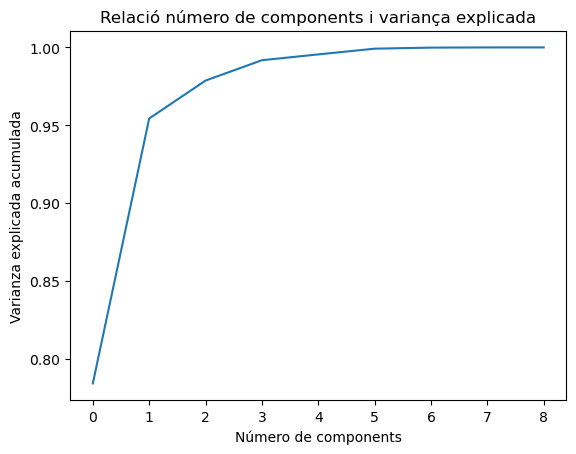

In [21]:
from sklearn.decomposition import PCA

pca = PCA().fit(df2[num_col])

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Relació número de components i variança explicada')
plt.xlabel('Número de components')
plt.ylabel('Varianza explicada acumulada')

Com és pot veure al gràfic, la majoria de la variància podria ser explicada per una única component (busquem una explicació del 95% de la variància), no obstant això, utilitzarem dos components per a aconseguir el 100% de variància explicada (la gràfica revela que amb dos components podem assolir aquest objectiu). Per tant, necessitem 2 components.

In [22]:
pca = PCA(.95).fit(df2[num_col])
print(f'El nombre de components per un 95% de variança és {pca.n_components_}')

El nombre de components per un 95% de variança és 2


In [23]:
# Dataframe amb la PCA per les variables numèriques

df_pca = pd.DataFrame(pca.transform(df2[num_col]), columns=["Component1", "Component2"], index=df2[num_col].index)

df_pca

,Component1,Component2
0,48.137742,39.279496
1,-14.878047,-2.241805
2,3.366761,3.437759
3,-14.882137,-2.248442
4,-14.272351,-1.395266
...,...,...
7045,-14.884432,-2.252168
7046,-14.792637,-2.143678
7047,-14.827039,-2.174169
7048,-11.068078,1.576671


Un cop fet la PCA a les variables numèriques, afegirem les variables categòriques (deixem fora la data i l'hora) que es troben en columnes dummies.

In [24]:
col_dummies = df2[['status_type_photo', 'status_type_status', 'status_type_video']]

df_kmeans = pd.concat([col_dummies, df_pca], axis=1)

df_kmeans

,status_type_photo,status_type_status,status_type_video,Component1,Component2
0,0,0,1,48.137742,39.279496
1,1,0,0,-14.878047,-2.241805
2,0,0,1,3.366761,3.437759
3,1,0,0,-14.882137,-2.248442
4,1,0,0,-14.272351,-1.395266
...,...,...,...,...,...
7045,1,0,0,-14.884432,-2.252168
7046,1,0,0,-14.792637,-2.143678
7047,1,0,0,-14.827039,-2.174169
7048,1,0,0,-11.068078,1.576671


Seguidament, aplicarem l'algoritme K-mean per fer clusters.

### K-means

K-means és un algorisme d'aprenentatge automàtic utilitzat en el clustering (agrupació). L'objectiu de l'algorisme K-means és la partició no supervisada de les dades en grups (clústers) per a la identificació de patrons, de manera que els elements dins d'un mateix grup siguin més similars entre sí que amb aquells d'altres grups. 

Hi ha alguns aspectes importants per a avaluar el rendiment i comprendre com s'han format els grups en el conjunt de dades:

- Els **centroides** són punts que representen el centre de cada grup trobat per l'algoritme.
- La inèrcia o 'Sum of Squared Errors' (**SSE**) representa la suma de les distàncies al quadrat entre cada punt de dades i el centroide del seu grup assignat. En K-means, l'objectiu és minimitzar la inèrcia (indica un agrupament més dens i es considera un millor resultat).
- La **convergència** significa que l'algoritme ha arribat a un estat en el qual els centroides ja no canvien significativament. Un valor baix indica que va convergir ràpidament, mentre que un valor alt vol dir que van necessitar més iteracions per a que els centroides i les assignacions de punts convergissin.

In [25]:
from sklearn.cluster import KMeans

# Model K-Means amb tres clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)

# Ajustem el model K-Means al dataset amb la PCA
kmeans.fit(df_kmeans)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [29]:
# Fem prediccions amb el dataset amb la PCA
pred = kmeans.predict(df_kmeans)

# Creem una nova columna amb els clusters obtinguts
df_kmeans['Clusters'] = pred

df_kmeans

,status_type_photo,status_type_status,status_type_video,Component1,Component2,Clusters
0,0,0,1,48.137742,39.279496,2
1,1,0,0,-14.878047,-2.241805,0
2,0,0,1,3.366761,3.437759,0
3,1,0,0,-14.882137,-2.248442,0
4,1,0,0,-14.272351,-1.395266,0
...,...,...,...,...,...,...
7045,1,0,0,-14.884432,-2.252168,0
7046,1,0,0,-14.792637,-2.143678,0
7047,1,0,0,-14.827039,-2.174169,0
7048,1,0,0,-11.068078,1.576671,0


In [66]:
# Mirem els principals aspectes del Kmeans

print(df_kmeans['Clusters'].value_counts())
print(f'\nSSE: {kmeans.inertia_}')
print(f'\nCentroides: {kmeans.cluster_centers_}')
print(f'\nIteracions fins la convergencia: {kmeans.n_iter_}')

0    6450
2     475
1      72
Name: Clusters, dtype: int64

SSE: 6013674.639920151

Centroides: [[ 6.57209302e-01  5.56589147e-02  2.77364341e-01 -1.11072325e+01
  -1.20816870e+00]
 [ 1.38888889e-02  1.38777878e-17  9.86111111e-01  3.35023362e+02
  -5.69661306e+01]
 [ 4.21052632e-03  6.93889390e-18  9.95789474e-01  1.00042036e+02
   2.50405254e+01]]

Iteracions fins la convergencia: 10


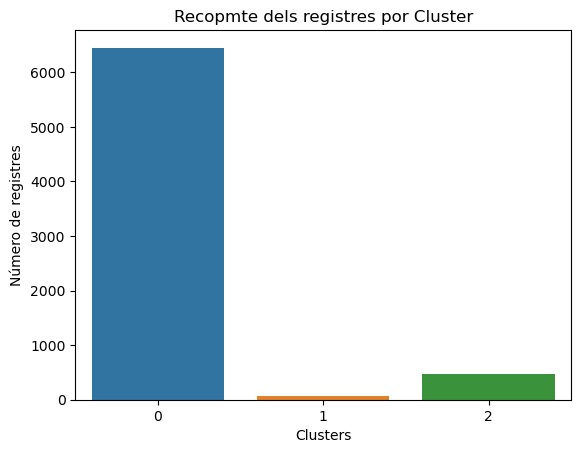

In [77]:
# Fem un gràfic del nombre de registres per cluster

cluster = df_kmeans['Clusters'].value_counts()

sns.barplot(x=cluster.index, y=cluster.values)
plt.xlabel('Clusters')
plt.ylabel('Número de registres')
plt.title('Recopmte dels registres por Cluster')
plt.show()

Clarament veiem que el cluster 0 té el major nombre de registres en comparació amb els altres. En el següent gràfic observarem com es distribueixen aquests valors.

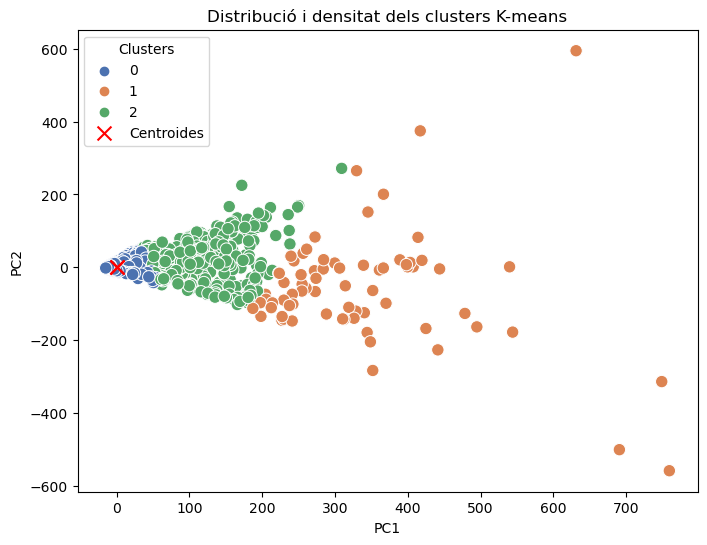

In [113]:
# Gràfic de la distribució i densitat dels clusters (K-means)

centroides = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component1', y='Component2', hue='Clusters', data=df_kmeans, palette='deep', s=80)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=100, label='Centroides')
plt.title('Distribució i densitat dels clusters (K-means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')
plt.show()

En el gràfic podem veure la dispersió de les dades dels components principals (PC1 i PC2). Tal com podem observar, destaca el cluster 0, on els seus registres es troben amb més densitat que els altres, indicant que aquests comparteixen molta similitud entre si. El seu centroide està situat a prop del 0 i agrupa la major part de les dades. D'altra banda, el cluster 1 i el 2 tenen les seves dades més disperses cap a valors més alts. 

L'elecció de realitzar 3 clusters ha sigut bona, ja que es pot apreciar una separació clara entre la distribució dels tres grups.

### Exercici 2
***
Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic.

El resultat principal del clustering jeràrquic és la jerarquia de clústers i les assignacions de clústers en diferents nivells.

In [99]:
df_agglo = df_kmeans.drop('Clusters', axis=1)

df_agglo

,status_type_photo,status_type_status,status_type_video,Component1,Component2
0,0,0,1,48.137742,39.279496
1,1,0,0,-14.878047,-2.241805
2,0,0,1,3.366761,3.437759
3,1,0,0,-14.882137,-2.248442
4,1,0,0,-14.272351,-1.395266
...,...,...,...,...,...
7045,1,0,0,-14.884432,-2.252168
7046,1,0,0,-14.792637,-2.143678
7047,1,0,0,-14.827039,-2.174169
7048,1,0,0,-11.068078,1.576671


In [118]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Model clustering jeràrquic amb tres clusters
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Ajustem el model Agglomerative Clustering al dataset amb la PCA i fem prediccions
pred2 = agglo.fit_predict(df_agglo)

# Creem una nova columna amb els clusters obtinguts
df_agglo['Clusters'] = pred2

df_agglo

,status_type_photo,status_type_status,status_type_video,Component1,Component2,Clusters
0,0,0,1,48.137742,39.279496,0
1,1,0,0,-14.878047,-2.241805,0
2,0,0,1,3.366761,3.437759,0
3,1,0,0,-14.882137,-2.248442,0
4,1,0,0,-14.272351,-1.395266,0
...,...,...,...,...,...,...
7045,1,0,0,-14.884432,-2.252168,0
7046,1,0,0,-14.792637,-2.143678,0
7047,1,0,0,-14.827039,-2.174169,0
7048,1,0,0,-11.068078,1.576671,0


In [119]:
# Mirem els principals aspectes del Agglomerative Clustering

print(df_agglo['Clusters'].value_counts())

0    6600
2     288
1     109
Name: Clusters, dtype: int64


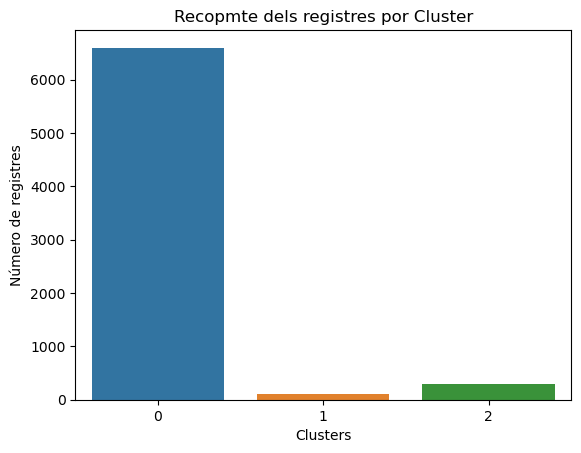

In [106]:
# Fem un gràfic del nombre de registres per cluster

cluster2 = df_agglo['Clusters'].value_counts()

sns.barplot(x=cluster2.index, y=cluster2.values)
plt.xlabel('Clusters')
plt.ylabel('Número de registres')
plt.title('Recopmte dels registres por Cluster')
plt.show()

El gràfic és molt semblant al del model K-means, on també el cluster 0 té el major nombre de registres en comparació amb els altres. En el següent gràfic observarem com es distribueixen aquests valors.

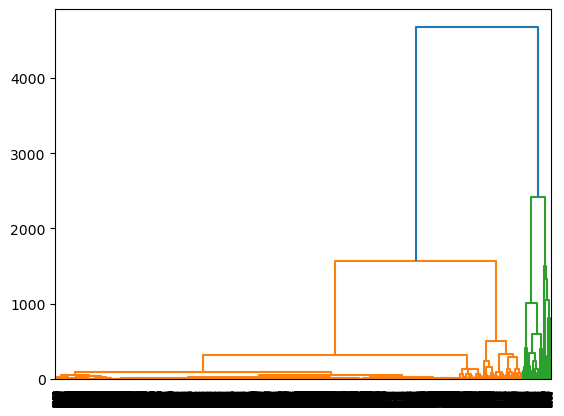

In [111]:
# Calcular la matriu d'enllaç i el dendrograma

linkage_matrix = sch.linkage(df_agglo, method='ward')
dendrogram = sch.dendrogram(linkage_matrix)

Amb el dendrograma podem veure com s'agrupen els clusters per distància.

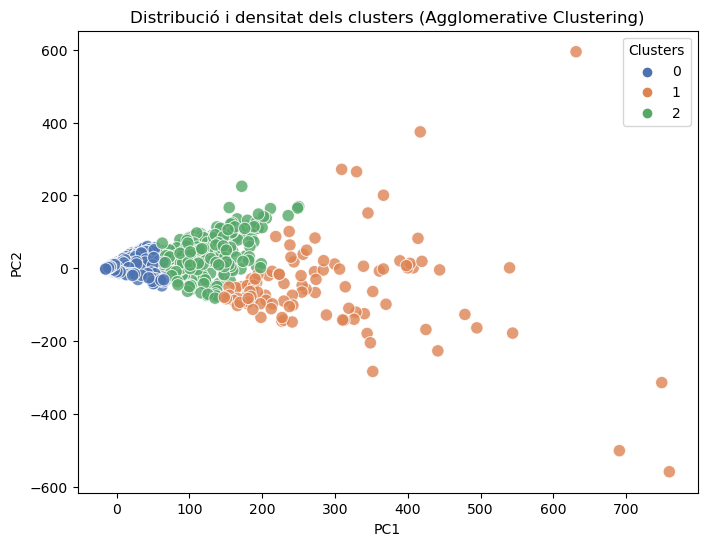

In [114]:
# Gràfic de la distribució i densitat dels clusters (Agglomerative Clustering)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component1', y='Component2', hue='Clusters', data=df_agglo, palette='deep', s=80, alpha=0.8)
plt.title('Distribució i densitat dels clusters (Agglomerative Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')
plt.show()

En el gràfic podem veure la dispersió de les dades dels components principals (PC1 i PC2). Tal com podem observar, s'assembla molt al model K-means, on també destaca el cluster 0 (els seus registres es troben amb més densitat que els altres, indicant que aquests comparteixen molta similitud entre si). En aquest cas, les variables mostren un comportament similar als clústers de K-Means.

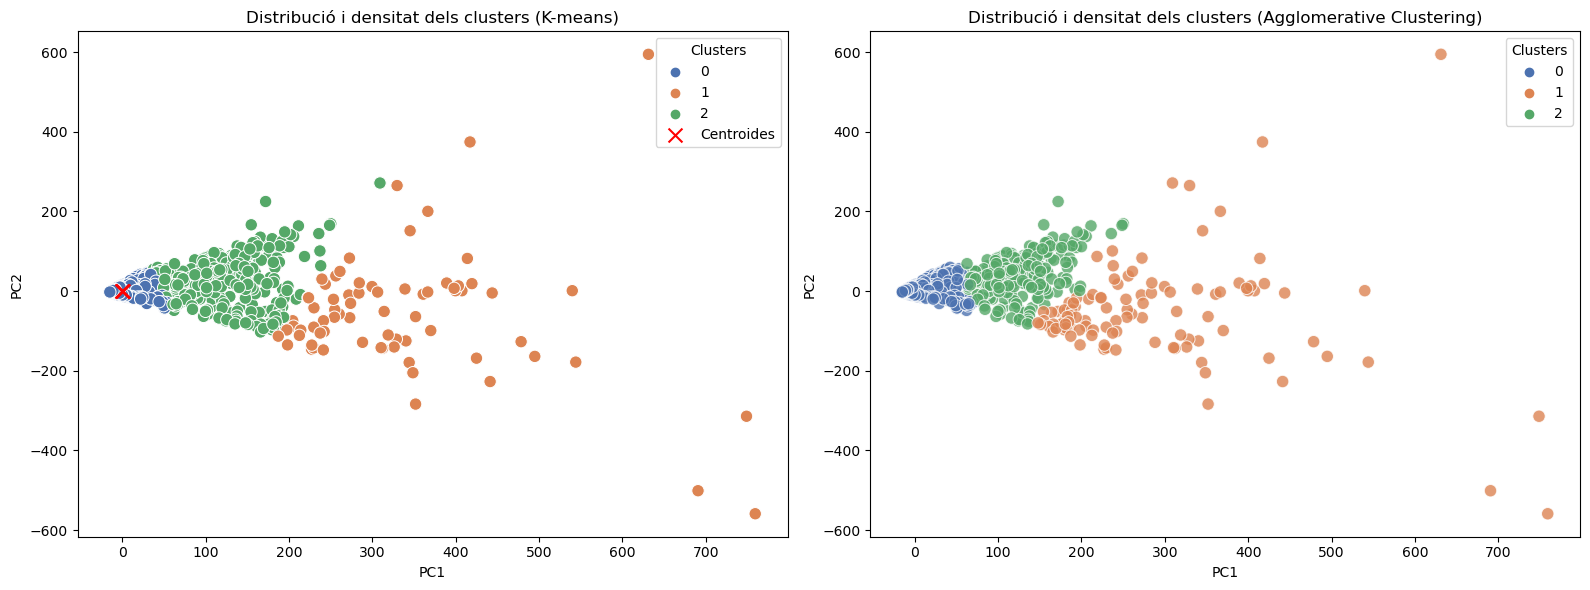

In [122]:
plt.figure(figsize=(16, 6))

# K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x='Component1', y='Component2', hue='Clusters', data=df_kmeans, palette='deep', s=80)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=100, label='Centroides')
plt.title('Distribució i densitat dels clusters (K-means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')

# Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Component1', y='Component2', hue='Clusters', data=df_agglo, palette='deep', s=80, alpha=0.8)
plt.title('Distribució i densitat dels clusters (Agglomerative Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')


plt.tight_layout()
plt.show()

Com podem observar, la principal diferencia entre els dos models és el cluster 2, en el K-means conté més registres que en el Agglomerative Clustering.

### Exercici 3
***
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [127]:
from sklearn.metrics import silhouette_score

km_sil = silhouette_score(df_kmeans, pred).round(3)
agglo_sil = silhouette_score(df_agglo, pred2).round(3)

print(f'Silhouette pel model K-means és de {km_sil}')
print(f'Silhouette pel model Agglomerative Clustering és de {agglo_sil}')

Silhouette pel model K-means és de 0.874
Silhouette pel model Agglomerative Clustering és de 0.875


Si mirem els resultats d'aquest paràmetre, podem concloure que, en general, tots dos models exhibeixen una qualitat destacada en els seus agrupaments, ja que han aconseguit una separació efectiva dels clústers (números propers a 1).

Per K-means, un valor de 0.874 indica que els punts dins de cada clúster estan molt cohesionats i ben separats dels altres clústers (suggereix una bona estructura). Pel que fa a Agglomerative Clustering, amb un valor de 0.875, també dona bons resultats en termes de cohesió i separació (mostra un rendiment molt lleugerment superior al K-Means).

En definitiva, tots dos models han assolit resultats notables, i la elecció depèn de les necessitats i objectius específics de l'anàlisi de dades.